In [1]:
import numpy as np
import pandas as pd
from nltk import word_tokenize
from string import punctuation
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB


from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix




import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.preprocessing import MinMaxScaler

import random
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Read preprocessed data

In [2]:
df = pd.read_csv("dataset_imdb_preprocessed.csv",index_col=0)
df

,sentiment,lemmatized_review
0,1,one reviewer ha mentioned watching 1 oz episod...
1,1,wonderful little production . filming techniqu...
2,1,thought wa wonderful way spend time hot summer...
3,0,basically 's family little boy ( jake ) think ...
4,1,petter mattei 's `` love time money '' visuall...
...,...,...
49995,1,thought movie right good job . wa n't creative...
49996,0,"bad plot , bad dialogue , bad acting , idiotic..."
49997,0,catholic taught parochial elementary school nu...
49998,0,'m going disagree previous comment side maltin...


# MultinomialNB using n_grams

In [4]:
df = pd.read_csv("dataset_imdb_preprocessed.csv",index_col=0)#train
twitter = pd.read_csv("dataset_product_preprocessed.csv",index_col=0)#test
twitter = twitter.dropna()


x_train, x_test, y_train, y_test = train_test_split(df['lemmatized_review'], df['sentiment'], test_size=0.2, random_state=seed)


y_test = twitter['Sentiment']
x_test = twitter['lemmatized_review']
    
    
#vectorizer = CountVectorizer()#85
# vectorizer = CountVectorizer(ngram_range=(1, 2))#88
vectorizer = CountVectorizer(ngram_range=(1, 3))#89
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
    
    
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
    
print(classification_report(y_test,y_pred))


Precision: 0.82
Recall: 1.00
F1 Score: 0.90
Accuracy: 0.89
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       129
           1       0.82      1.00      0.90       129

    accuracy                           0.89       258
   macro avg       0.91      0.89      0.89       258
weighted avg       0.91      0.89      0.89       258



# MultinomialNB using TF-IDF

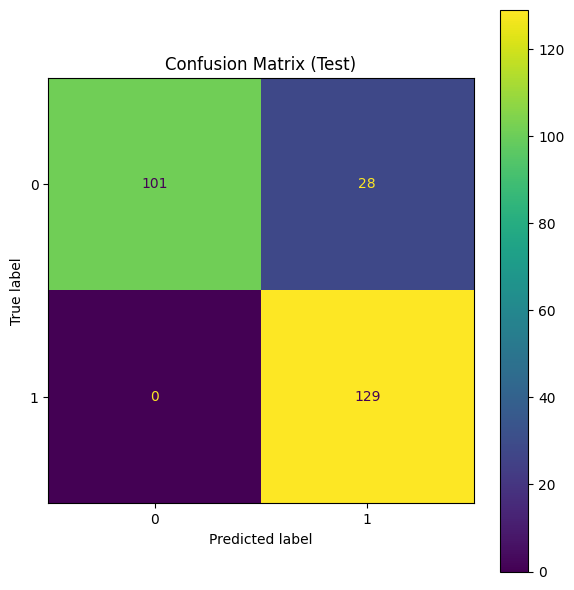

In [5]:
cm_test = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6))  

ConfusionMatrixDisplay(cm_test).plot(ax=ax, colorbar=True)
ax.set_title('Confusion Matrix (Test)')

plt.tight_layout()
plt.show()

In [6]:
y_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)